In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [23]:
dt = 1.  # ms
duration = 3000.  # ms
t = np.arange(0., duration, dt)

spike_times = [1000., 1100., 1110.]+[2000.+i*10. for i in xrange(10)]
spike_indexes = [np.where(t >= spike_time)[0][0] for spike_time in spike_times]
spike_count = np.zeros_like(t)
spike_count[spike_indexes] = 1.

filter_duration = 100.  # ms
# The smoothing filter should be 'acausal', meaning it starts before time zero.
# This will create an offset that will have to be dealt with in a moment...
filter_t = np.arange(-filter_duration, filter_duration, dt)

sigma = filter_duration / 3. / np.sqrt(2.)  # contains 99.7% gaussian area
gaussian_filter = np.exp(-(filter_t/sigma)**2.)
# The area of a convolution filter affects the amplitude of the resulting signal.
# The time integral of the filter (the area under the curve) should be 1.
gaussian_filter /= np.trapz(gaussian_filter, dx=dt/1000.)  # convert ms to sec

<IPython.core.display.Javascript object>


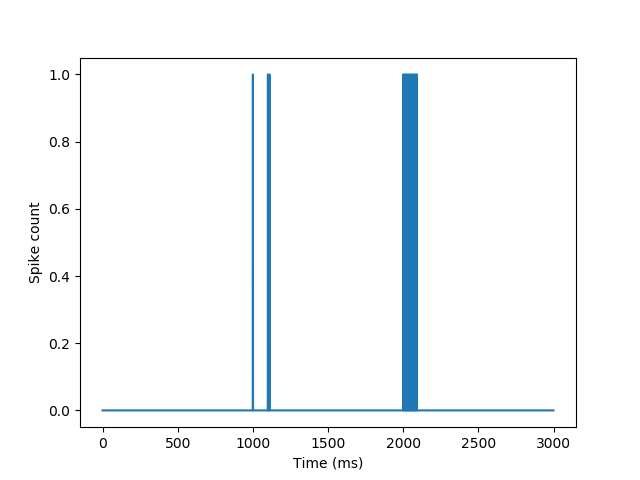

In [24]:
fig = plt.figure()
plt.plot(t, spike_count)
plt.xlabel('Time (ms)')
plt.ylabel('Spike count')
fig.show()

<IPython.core.display.Javascript object>


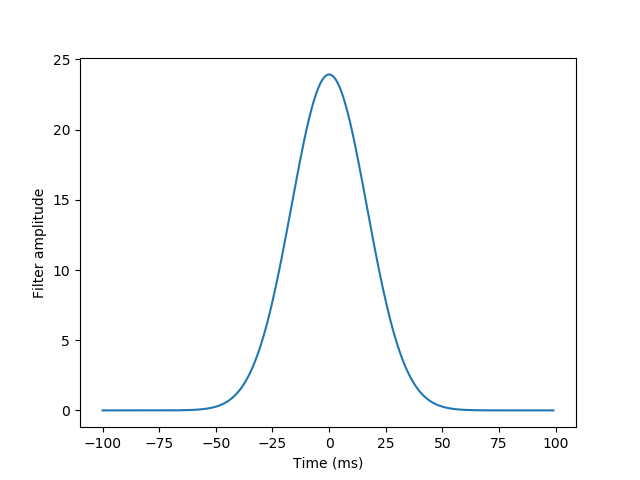

In [25]:
fig = plt.figure()
plt.plot(filter_t, gaussian_filter)
plt.xlabel('Time (ms)')
plt.ylabel('Filter amplitude')
fig.show()

In [26]:
test_signal = np.convolve(spike_count, gaussian_filter)
test_signal_t = np.arange(0., len(test_signal) * dt, dt)

print 'Source length: %i, filter length: %i, resulting signal length: %i' % (len(spike_count), len(gaussian_filter), 
                                                                             len(test_signal))

Source length: 3000, filter length: 200, resulting signal length: 3199


<IPython.core.display.Javascript object>


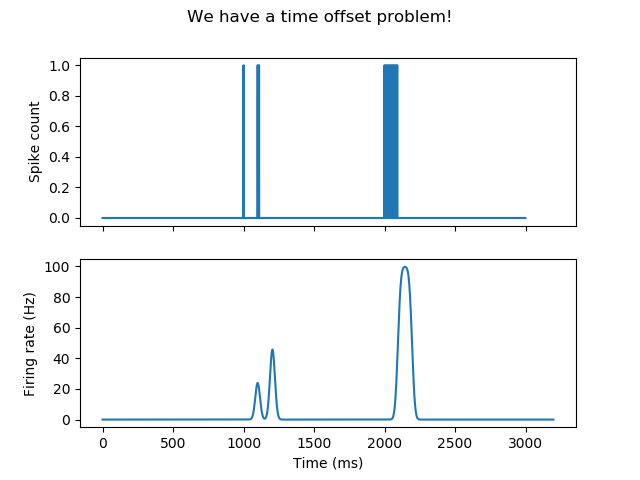

In [30]:
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(t, spike_count)
axes[1].plot(test_signal_t, test_signal)
axes[1].set_xlabel('Time (ms)')
axes[0].set_ylabel('Spike count')
axes[1].set_ylabel('Firing rate (Hz)')
fig.suptitle('We have a time offset problem!')
fig.show()

In [28]:
# so our signal needs to start at time zero of the filter, and extend the length of the original trace
signal = test_signal[int(filter_duration/dt):][:len(spike_count)]
print 'Signal length: %i' % len(signal)

Signal length: 3000


<IPython.core.display.Javascript object>


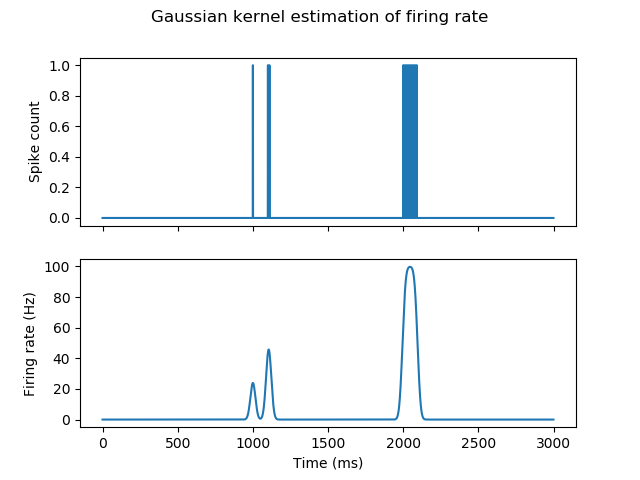

In [29]:
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(t, spike_count)
axes[1].plot(t, signal)
axes[1].set_xlabel('Time (ms)')
axes[0].set_ylabel('Spike count')
axes[1].set_ylabel('Firing rate (Hz)')
fig.suptitle('Gaussian kernel estimation of firing rate')
fig.show()